In [35]:
from db_manager import DatabaseManager

In [36]:
db_manager = DatabaseManager()

In [37]:
db_manager.create_database('cs432g3')

In [38]:
db_manager.list_databases()

['cs432g3']

In [39]:
student_schema = {
    "Roll_number": int,
    "First_name": str,
    "Middle_name": str,
    "Last_name": str,
    "Email_id": str,
    "Discipline": str,
    "Program": str
}

In [40]:
phone_schema = {
    "Work": int,
    "Home": int,
    "Emergency": int
}

In [41]:
db_manager.create_table('cs432g3', 'phone', phone_schema, order=6, search_key= "Work")

Table phone is created successfully in the database cs432g3


In [42]:
db_manager.create_table('cs432g3', 'students', student_schema, order=6, search_key= "Roll_number")

Table students is created successfully in the database cs432g3


In [43]:
tables_name = db_manager.list_tables('cs432g3')
tables_name

['phone', 'students']

In [44]:
table_stu = db_manager.get_table('cs432g3', 'students')
table_stu.get_all()

[]

In [45]:
rec =  {
  "Roll_number": 1,
  "First_name": "John",
  "Middle_name": "Michael",
  "Last_name": "Doe",
  "Email_id": "john.doe@example.com",
  "Discipline": "Computer Science",
  "Program": "Bachelor of Technology"
}

### INsertion

In [46]:
table_stu.insert(rec)

data inserted successfully


### Search

In [47]:
record = table_stu.get(1)
record


{'Roll_number': 1,
 'First_name': 'John',
 'Middle_name': 'Michael',
 'Last_name': 'Doe',
 'Email_id': 'john.doe@example.com',
 'Discipline': 'Computer Science',
 'Program': 'Bachelor of Technology'}

In [48]:
new_rec = {'Roll_number': 2,
 'First_name': 'alex',
 'Middle_name': 'Michael',
 'Last_name': 'Doe',
 'Email_id': '@example.com',
 'Discipline': 'ece',
 'Program': 'Bachelor of Technology'}
table_stu.insert(new_rec)

data inserted successfully


In [49]:
new_rec = {'Roll_number': 3,
 'First_name': 'alex',
 'Middle_name': 'Michael',
 'Last_name': 'Doe',
 'Email_id': 'adoe@example.com',
 'Discipline': 'ms',
 'Program': 'Bachelor of Technology'}
table_stu.insert(new_rec)

data inserted successfully


In [50]:
new_rec = {'Roll_number': 4,
 'First_name': 'alex',
 'Middle_name': 'Michael',
 'Last_name': 'Doe',
 'Email_id': 'adoe@example.com',
 'Discipline': 'ee',
 'Program': 'Bachelor of Technology'}

In [51]:
table_stu.insert(new_rec)

data inserted successfully


### Update

In [52]:
new_rec = {'Roll_number': 1,
 'First_name': 'alex',
 'Middle_name': 'Michael',
 'Last_name': 'Doe',
 'Email_id': 'alex.doe@example.com',
 'Discipline': 'Computer Science',
 'Program': 'Bachelor of Technology'}

In [53]:
table_stu.update(1, new_rec)

In [54]:
record = table_stu.get(1)
record

{'Roll_number': 1,
 'First_name': 'alex',
 'Middle_name': 'Michael',
 'Last_name': 'Doe',
 'Email_id': 'alex.doe@example.com',
 'Discipline': 'Computer Science',
 'Program': 'Bachelor of Technology'}

In [55]:
table_stu.get_all()

[(1,
  {'Roll_number': 1,
   'First_name': 'alex',
   'Middle_name': 'Michael',
   'Last_name': 'Doe',
   'Email_id': 'alex.doe@example.com',
   'Discipline': 'Computer Science',
   'Program': 'Bachelor of Technology'}),
 (2,
  {'Roll_number': 2,
   'First_name': 'alex',
   'Middle_name': 'Michael',
   'Last_name': 'Doe',
   'Email_id': '@example.com',
   'Discipline': 'ece',
   'Program': 'Bachelor of Technology'}),
 (3,
  {'Roll_number': 3,
   'First_name': 'alex',
   'Middle_name': 'Michael',
   'Last_name': 'Doe',
   'Email_id': 'adoe@example.com',
   'Discipline': 'ms',
   'Program': 'Bachelor of Technology'}),
 (4,
  {'Roll_number': 4,
   'First_name': 'alex',
   'Middle_name': 'Michael',
   'Last_name': 'Doe',
   'Email_id': 'adoe@example.com',
   'Discipline': 'ee',
   'Program': 'Bachelor of Technology'})]

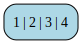

In [56]:
from IPython.display import SVG, display

dot = table_stu.data.visualize_tree()
svg_data = dot.pipe(format='svg').decode('utf-8')
display(SVG(svg_data))

### Deletion

In [57]:
table_stu.delete(3)

In [58]:
table_stu.get_all()

[(1,
  {'Roll_number': 1,
   'First_name': 'alex',
   'Middle_name': 'Michael',
   'Last_name': 'Doe',
   'Email_id': 'alex.doe@example.com',
   'Discipline': 'Computer Science',
   'Program': 'Bachelor of Technology'}),
 (2,
  {'Roll_number': 2,
   'First_name': 'alex',
   'Middle_name': 'Michael',
   'Last_name': 'Doe',
   'Email_id': '@example.com',
   'Discipline': 'ece',
   'Program': 'Bachelor of Technology'}),
 (4,
  {'Roll_number': 4,
   'First_name': 'alex',
   'Middle_name': 'Michael',
   'Last_name': 'Doe',
   'Email_id': 'adoe@example.com',
   'Discipline': 'ee',
   'Program': 'Bachelor of Technology'})]

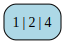

In [59]:
from IPython.display import SVG, display

dot = table_stu.data.visualize_tree()
svg_data = dot.pipe(format='svg').decode('utf-8')
display(SVG(svg_data))

In [60]:
table_stu.get(2)

{'Roll_number': 2,
 'First_name': 'alex',
 'Middle_name': 'Michael',
 'Last_name': 'Doe',
 'Email_id': '@example.com',
 'Discipline': 'ece',
 'Program': 'Bachelor of Technology'}

### Range Query

In [61]:
import random
import string

def random_record_generator(schema, n):
    def random_value(data_type):
        if data_type == int:
            return random.randint(5, 1000)
        elif data_type == float:
            return round(random.uniform(18.0, 60.0), 2)
        elif data_type == str:
            return ''.join(random.choices(string.ascii_letters, k=6))
        else:
            return None  # Unknown type

    records = []
    for _ in range(n):
        record = {}
        for field, field_type in schema.items():
            record[field] = random_value(field_type)
        records.append(record)
    return records

import pandas as pd
records = random_record_generator(student_schema, 50)

for rec in records:
    table_stu.insert(rec)

data inserted successfully
data inserted successfully
data inserted successfully
data inserted successfully
data inserted successfully
data inserted successfully
data inserted successfully
data inserted successfully
data inserted successfully
data inserted successfully
data inserted successfully
data inserted successfully
data inserted successfully
data inserted successfully
data inserted successfully
data inserted successfully
data inserted successfully
data inserted successfully
data inserted successfully
data inserted successfully
data inserted successfully
data inserted successfully
data inserted successfully
data inserted successfully
data inserted successfully
data inserted successfully
data inserted successfully
data inserted successfully
Duplicate key '850' detected.
data inserted successfully
data inserted successfully
data inserted successfully
data inserted successfully
data inserted successfully
data inserted successfully
data inserted successfully
data inserted successfull

In [62]:
table_stu.range_query(37, 100)

[(51,
  {'Roll_number': 51,
   'First_name': 'SOTSmX',
   'Middle_name': 'nhsCqn',
   'Last_name': 'fQduTg',
   'Email_id': 'EZZiEL',
   'Discipline': 'IUvkTm',
   'Program': 'phuRZP'}),
 (95,
  {'Roll_number': 95,
   'First_name': 'wNHarD',
   'Middle_name': 'DELLYj',
   'Last_name': 'GjURXo',
   'Email_id': 'kIIzhd',
   'Discipline': 'qyMuJL',
   'Program': 'bGayPc'})]

In [63]:
table_stu.get_all()


[(1,
  {'Roll_number': 1,
   'First_name': 'alex',
   'Middle_name': 'Michael',
   'Last_name': 'Doe',
   'Email_id': 'alex.doe@example.com',
   'Discipline': 'Computer Science',
   'Program': 'Bachelor of Technology'}),
 (2,
  {'Roll_number': 2,
   'First_name': 'alex',
   'Middle_name': 'Michael',
   'Last_name': 'Doe',
   'Email_id': '@example.com',
   'Discipline': 'ece',
   'Program': 'Bachelor of Technology'}),
 (4,
  {'Roll_number': 4,
   'First_name': 'alex',
   'Middle_name': 'Michael',
   'Last_name': 'Doe',
   'Email_id': 'adoe@example.com',
   'Discipline': 'ee',
   'Program': 'Bachelor of Technology'}),
 (51,
  {'Roll_number': 51,
   'First_name': 'SOTSmX',
   'Middle_name': 'nhsCqn',
   'Last_name': 'fQduTg',
   'Email_id': 'EZZiEL',
   'Discipline': 'IUvkTm',
   'Program': 'phuRZP'}),
 (95,
  {'Roll_number': 95,
   'First_name': 'wNHarD',
   'Middle_name': 'DELLYj',
   'Last_name': 'GjURXo',
   'Email_id': 'kIIzhd',
   'Discipline': 'qyMuJL',
   'Program': 'bGayPc'}),
 (

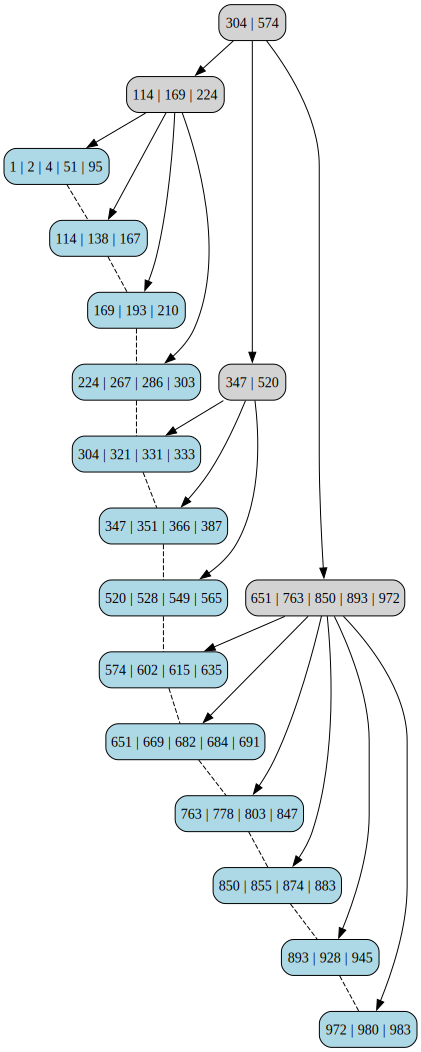

In [64]:
from IPython.display import SVG, display

dot = table_stu.data.visualize_tree()
svg_data = dot.pipe(format='svg').decode('utf-8')
display(SVG(svg_data))

## Performance testing

Testing size: 2000
Testing size: 4000
Testing size: 6000
Testing size: 8000
Testing size: 10000
Testing size: 12000
Testing size: 14000
Testing size: 16000
Testing size: 18000
Testing size: 20000
Testing size: 22000
Testing size: 24000
Testing size: 26000
Testing size: 28000
Testing size: 30000
Testing size: 32000
Testing size: 34000
Testing size: 36000
Testing size: 38000
Testing size: 40000
Testing size: 42000
Testing size: 44000
Testing size: 46000
Testing size: 48000


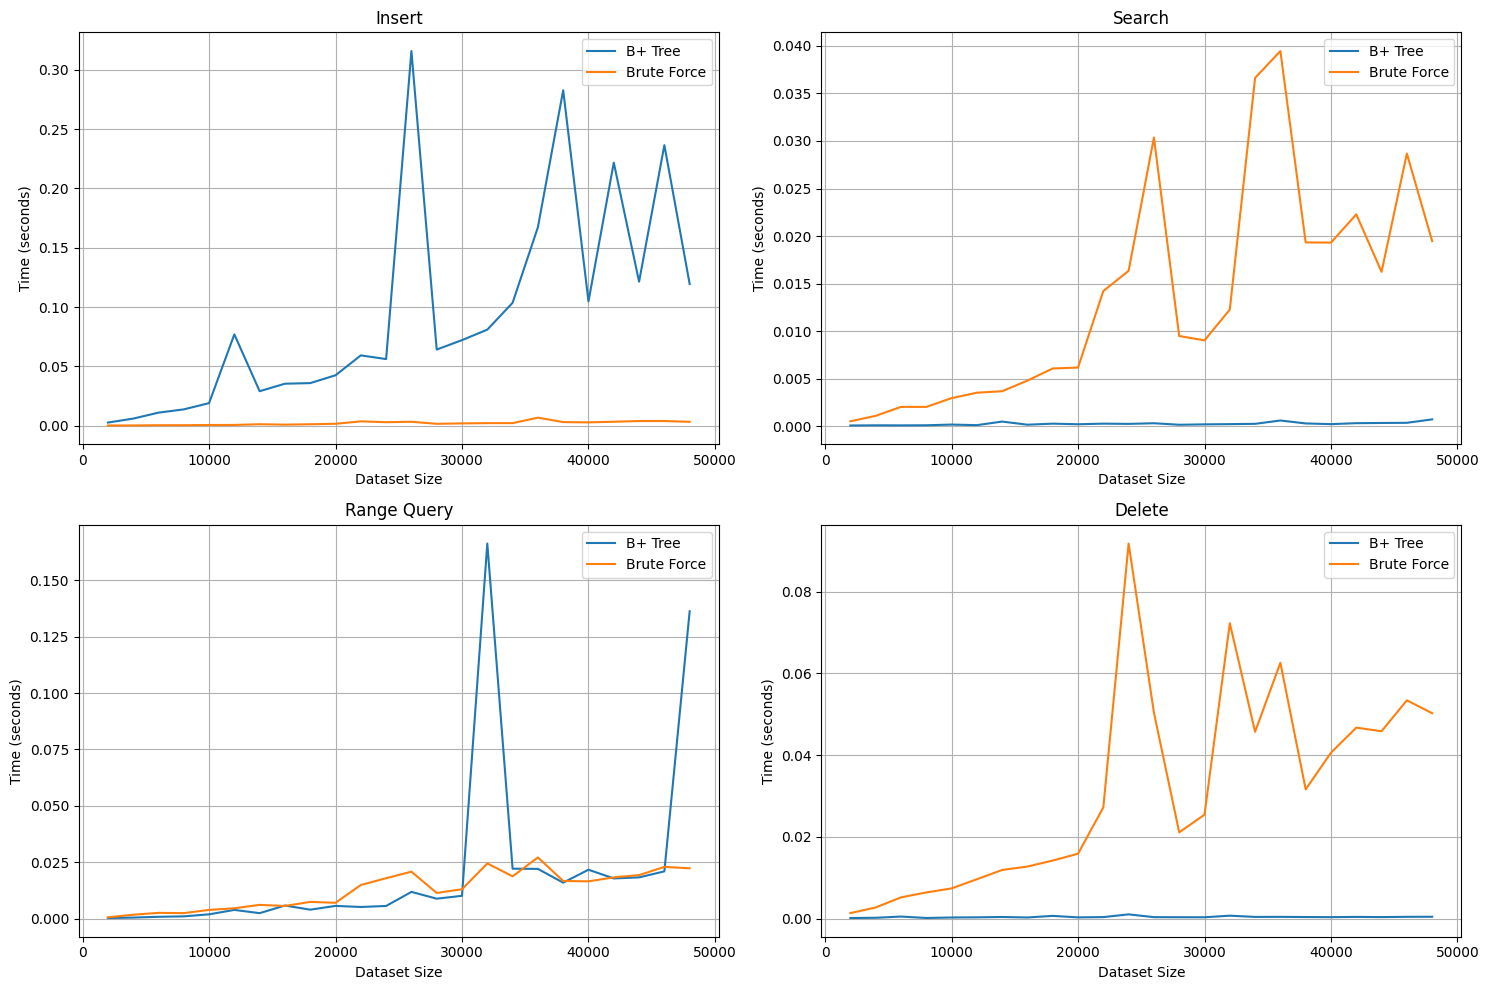

In [31]:
import time
import random
import matplotlib.pyplot as plt
from bplustree import BPlusTree  # Your B+ Tree implementation
from bruteforce import BruteForceDB  # The brute force implementation you provided

class PerformanceTester:
    def __init__(self):
        self.sizes = list(range(2000, 50000, 2000))  # From 100 to 10,000 in steps of 500
        self.results = {
            'insert': {'bptree': [], 'bruteforce': []},
            'search': {'bptree': [], 'bruteforce': []},
            'range_query': {'bptree': [], 'bruteforce': []},
            'delete': {'bptree': [], 'bruteforce': []}
        }

    def generate_test_data(self, size):
        """Generate unique random keys for testing"""
        return random.sample(range(size * 10), size)

    def test_insert(self, data):
        """Test insertion performance for both implementations"""
        # B+ Tree test
        bptree = BPlusTree(order=8)
        start = time.perf_counter()
        for key in data:
            bptree.insert(key, f"value_{key}")
        bptree_time = time.perf_counter() - start

        # BruteForce test
        brute_db = BruteForceDB()
        start = time.perf_counter()
        for key in data:
            brute_db.insert(key)
        brute_time = time.perf_counter() - start

        return bptree_time, brute_time, bptree, brute_db

    def test_search(self, data, bptree, brute_db):
        """Test search performance with existing data"""
        test_keys = random.sample(data, min(100, len(data)))

        # B+ Tree search
        start = time.perf_counter()
        for key in test_keys:
            bptree.search(key)
        bptree_time = time.perf_counter() - start

        # BruteForce search
        start = time.perf_counter()
        for key in test_keys:
            brute_db.search(key)
        brute_time = time.perf_counter() - start

        return bptree_time, brute_time

    def test_range_query(self, data, bptree, brute_db):
        """Test range query performance with more realistic ranges"""
        if not data:
            return 0.0, 0.0  # Handle empty dataset case
        
        data_sorted = sorted(data)
        # Ensure range covers at least 1 element but no more than 10% of data
        range_size = max(1, len(data) // 10)
        ranges = []
        
        for _ in range(10):
            # Ensure we don't go out of bounds
            max_start = len(data_sorted) - range_size
            if max_start <= 0:  # Dataset smaller than range size
                start_key = data_sorted[0]
                end_key = data_sorted[-1]
            else:
                start = random.randint(0, max_start)
                end = start + range_size - 1  # -1 to stay within bounds
                start_key = data_sorted[start]
                end_key = data_sorted[end]
            ranges.append((start_key, end_key))
        
        # B+ Tree range query
        start = time.perf_counter()
        for start_key, end_key in ranges:
            bptree.range_query(start_key, end_key)
        bptree_time = time.perf_counter() - start
        
        # BruteForce range query
        start = time.perf_counter()
        for start_key, end_key in ranges:
            brute_db.range_query(start_key, end_key)
        brute_time = time.perf_counter() - start
        
        return bptree_time, brute_time

    # def test_range_query(self, data, bptree, brute_db):
    #     """Test range query performance"""
    #     # Create 10 random ranges within the data bounds
    #     min_key, max_key = min(data), max(data)
    #     ranges = [(random.randint(min_key, max_key), 
    #               random.randint(min_key, max_key)) 
    #              for _ in range(10)]

    #     # B+ Tree range query
    #     start = time.perf_counter()
    #     for start_key, end_key in ranges:
    #         bptree.range_query(min(start_key, end_key), max(start_key, end_key))
    #     bptree_time = time.perf_counter() - start

    #     # BruteForce range query
    #     start = time.perf_counter()
    #     for start_key, end_key in ranges:
    #         brute_db.range_query(min(start_key, end_key), max(start_key, end_key))
    #     brute_time = time.perf_counter() - start

    #     return bptree_time, brute_time

    def test_delete(self, data, bptree, brute_db):
        """Test deletion performance"""
        delete_keys = random.sample(data, min(100, len(data)))

        # B+ Tree delete
        start = time.perf_counter()
        for key in delete_keys:
            bptree.delete(key)
        bptree_time = time.perf_counter() - start

        # BruteForce delete
        start = time.perf_counter()
        for key in delete_keys:
            brute_db.delete(key)
        brute_time = time.perf_counter() - start

        return bptree_time, brute_time

    def run_tests(self):
        """Execute all performance tests"""
        for size in self.sizes:
            data = self.generate_test_data(size)
            print(f"Testing size: {size}")

            # Insertion test
            ins_bpt, ins_brute, bptree, brute_db = self.test_insert(data)
            self.results['insert']['bptree'].append(ins_bpt)
            self.results['insert']['bruteforce'].append(ins_brute)

            # Search test
            srch_bpt, srch_brute = self.test_search(data, bptree, brute_db)
            self.results['search']['bptree'].append(srch_bpt)
            self.results['search']['bruteforce'].append(srch_brute)

            # Range query test
            rng_bpt, rng_brute = self.test_range_query(data, bptree, brute_db)
            self.results['range_query']['bptree'].append(rng_bpt)
            self.results['range_query']['bruteforce'].append(rng_brute)

            # Delete test
            del_bpt, del_brute = self.test_delete(data, bptree, brute_db)
            self.results['delete']['bptree'].append(del_bpt)
            self.results['delete']['bruteforce'].append(del_brute)

    def plot_results(self):
        """Visualize the performance comparison"""
        plt.figure(figsize=(15, 10))
        
        # Create subplots for each operation
        operations = ['insert', 'search', 'range_query', 'delete']
        for i, op in enumerate(operations, 1):
            plt.subplot(2, 2, i)
            plt.plot(self.sizes, self.results[op]['bptree'], label='B+ Tree')
            plt.plot(self.sizes, self.results[op]['bruteforce'], label='Brute Force')
            plt.title(op.replace('_', ' ').title())
            plt.xlabel('Dataset Size')
            plt.ylabel('Time (seconds)')
            plt.legend()
            plt.grid(True)
        
        plt.tight_layout()
        plt.savefig('performance_comparison.png')
        plt.show()

if __name__ == "__main__":
    tester = PerformanceTester()
    tester.run_tests()
    tester.plot_results()

#### the reason for above sudden peaks in range query for B+ tree graph is because we are doing a search on unsorted data...


Testing size: 2000

Testing size: 4000

Testing size: 6000

Testing size: 8000

Testing size: 10000

Testing size: 12000

Testing size: 14000

Testing size: 16000

Testing size: 18000

Testing size: 20000

Testing size: 22000

Testing size: 24000

Testing size: 26000

Testing size: 28000

Testing size: 30000

Testing size: 32000

Testing size: 34000

Testing size: 36000

Testing size: 38000

Testing size: 40000

Testing size: 42000

Testing size: 44000

Testing size: 46000

Testing size: 48000


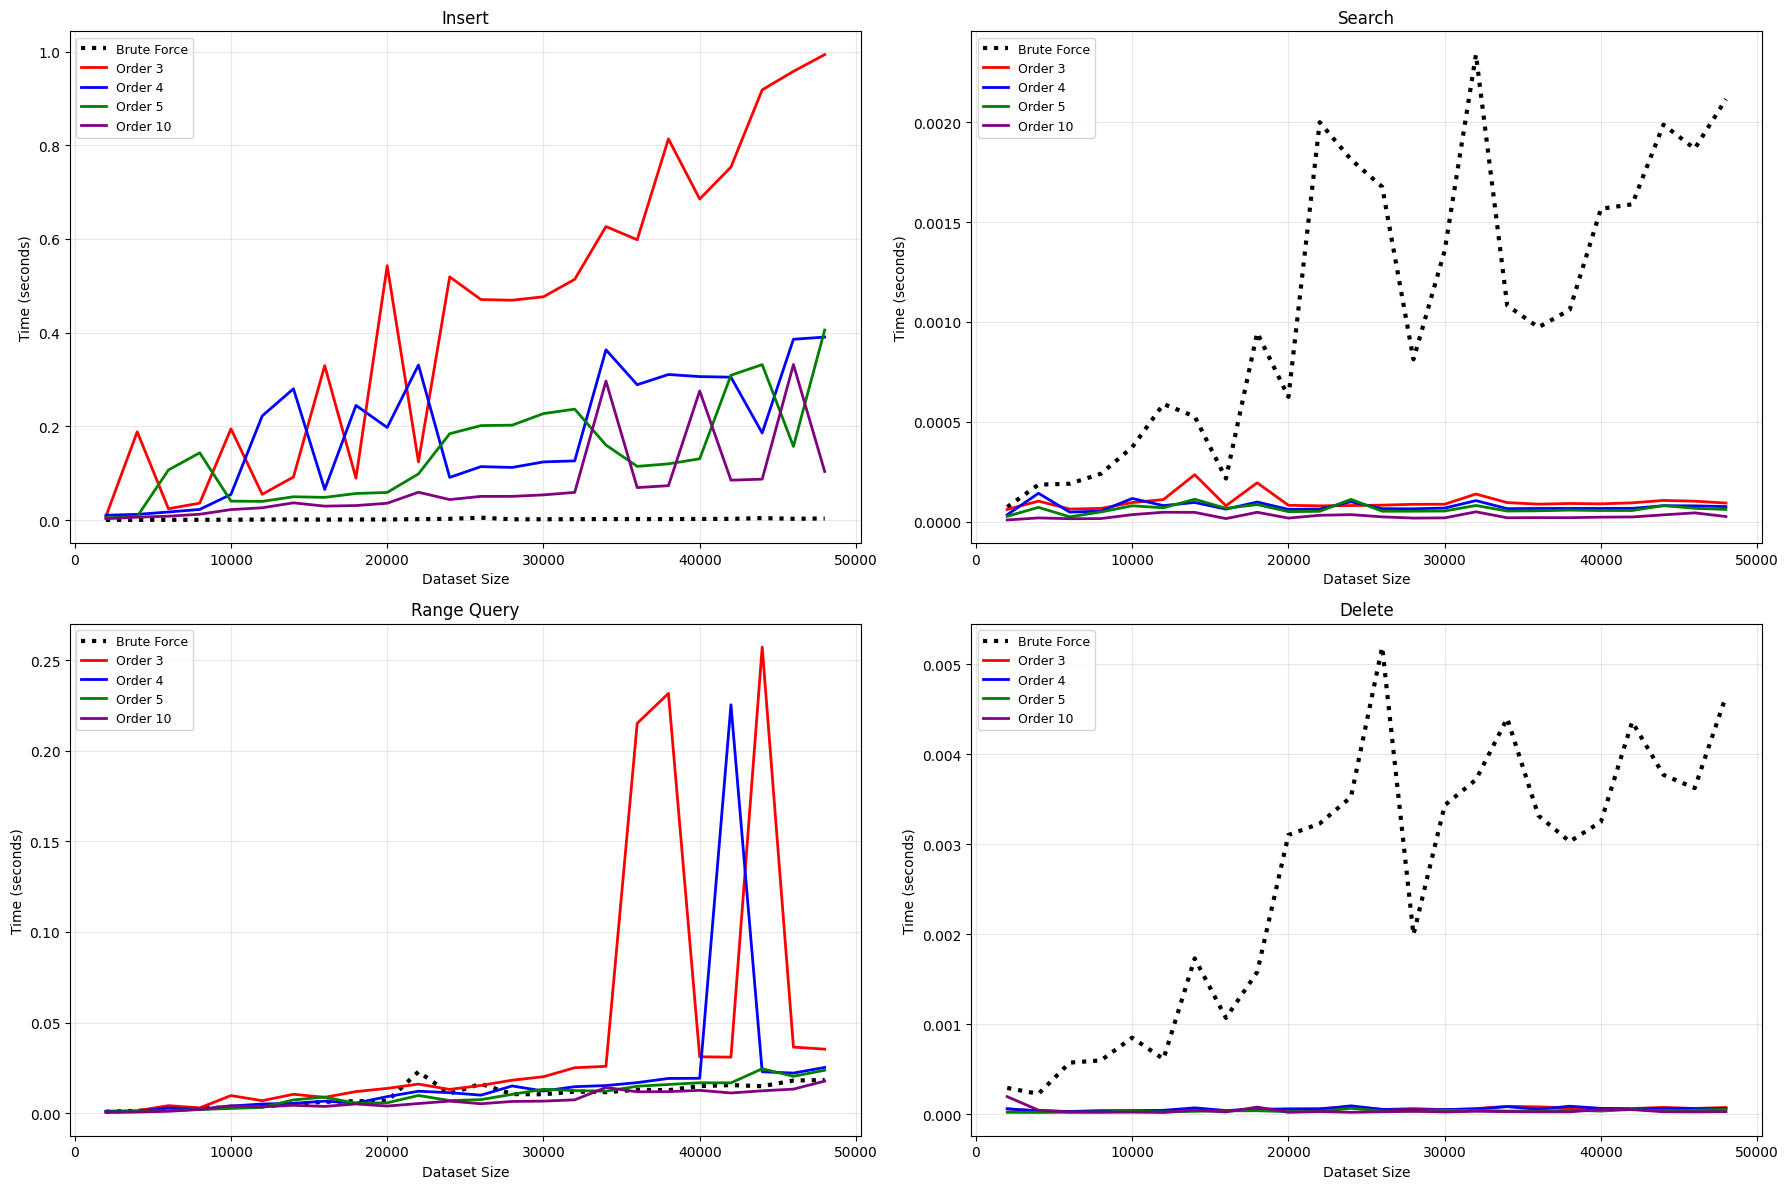

In [36]:
import time
import random
import matplotlib.pyplot as plt
from bplustree import BPlusTree
from bruteforce import BruteForceDB

class PerformanceTester:
    def __init__(self):
        # Test parameters
        self.sizes = list(range(2000, 50000, 2000))  # Dataset sizes to test
        self.orders = [3, 4, 5, 10]  # Different B+ tree orders to compare
        self.num_tests = 10  # Number of operations to test per measurement
        
        # Results storage
        self.results = {
            'insert': {'bruteforce': []},
            'search': {'bruteforce': []},
            'range_query': {'bruteforce': []},
            'delete': {'bruteforce': []}
        }
        
        # Initialize results for each B+ tree order
        for order in self.orders:
            for operation in self.results:
                self.results[operation][f'order_{order}'] = []

    def generate_test_data(self, size):
        """Generate unique random data for testing"""
        return random.sample(range(size * 10), size)

    def test_operations(self, data):
        """Test all operations on all implementations for one dataset size"""
        results = {}
        
        # Test brute force implementation
        brute_db = BruteForceDB()
        
        # Insertion test
        start = time.perf_counter()
        for key in data:
            brute_db.insert(key)
        results['insert_brute'] = time.perf_counter() - start
        
        # Initialize B+ trees for each order
        bptrees = {order: BPlusTree(order=order) for order in self.orders}
        
        # Insert into B+ trees
        for order in self.orders:
            start = time.perf_counter()
            for key in data:
                bptrees[order].insert(key, f"value_{key}")
            results[f'insert_order_{order}'] = time.perf_counter() - start
        
        # Search test (using same keys for all implementations)
        test_keys = random.sample(data, min(self.num_tests, len(data)))
        
        # Brute force search
        start = time.perf_counter()
        for key in test_keys:
            brute_db.search(key)
        results['search_brute'] = time.perf_counter() - start
        
        # B+ tree searches
        for order in self.orders:
            start = time.perf_counter()
            for key in test_keys:
                bptrees[order].search(key)
            results[f'search_order_{order}'] = time.perf_counter() - start
        
        # Range query test
        data_sorted = sorted(data)
        range_size = max(1, len(data) // 10)  # Test ranges covering ~10% of data
        
        # Generate ranges
        ranges = []
        for _ in range(self.num_tests):
            max_start = len(data_sorted) - range_size
            if max_start <= 0:
                start_key = data_sorted[0]
                end_key = data_sorted[-1]
            else:
                start = random.randint(0, max_start)
                end = start + range_size - 1
                start_key = data_sorted[start]
                end_key = data_sorted[end]
            ranges.append((start_key, end_key))
        
        # Brute force range queries
        start = time.perf_counter()
        for start_key, end_key in ranges:
            brute_db.range_query(start_key, end_key)
        results['range_brute'] = time.perf_counter() - start
        
        # B+ tree range queries
        for order in self.orders:
            start = time.perf_counter()
            for start_key, end_key in ranges:
                bptrees[order].range_query(start_key, end_key)
            results[f'range_order_{order}'] = time.perf_counter() - start
        
        # Delete test (use fresh trees to avoid affecting other tests)
        delete_keys = random.sample(data, min(self.num_tests, len(data)))
        
        # Brute force deletes
        temp_brute = BruteForceDB()
        for key in data:
            temp_brute.insert(key)
        
        start = time.perf_counter()
        for key in delete_keys:
            temp_brute.delete(key)
        results['delete_brute'] = time.perf_counter() - start
        
        # B+ tree deletes
        for order in self.orders:
            temp_tree = BPlusTree(order=order)
            for key in data:
                temp_tree.insert(key, f"value_{key}")
            
            start = time.perf_counter()
            for key in delete_keys:
                temp_tree.delete(key)
            results[f'delete_order_{order}'] = time.perf_counter() - start
        
        return results

    def run_tests(self):
        """Run all tests across all dataset sizes"""
        for size in self.sizes:
            print(f"\nTesting size: {size}")
            data = self.generate_test_data(size)
            results = self.test_operations(data)
            
            # Store results
            self.results['insert']['bruteforce'].append(results['insert_brute'])
            self.results['search']['bruteforce'].append(results['search_brute'])
            self.results['range_query']['bruteforce'].append(results['range_brute'])
            self.results['delete']['bruteforce'].append(results['delete_brute'])
            
            for order in self.orders:
                self.results['insert'][f'order_{order}'].append(results[f'insert_order_{order}'])
                self.results['search'][f'order_{order}'].append(results[f'search_order_{order}'])
                self.results['range_query'][f'order_{order}'].append(results[f'range_order_{order}'])
                self.results['delete'][f'order_{order}'].append(results[f'delete_order_{order}'])

    def plot_results(self):
        """Create comparison plots"""
        plt.figure(figsize=(18, 12))
        operations = ['insert', 'search', 'range_query', 'delete']
        colors = ['red', 'blue', 'green', 'purple', 'orange']  # For different orders
        
        for i, op in enumerate(operations, 1):
            plt.subplot(2, 2, i)
            
            # Plot brute force
            plt.plot(self.sizes, self.results[op]['bruteforce'], 
                    label='Brute Force', linewidth=3, linestyle=':', color='black')
            
            # Plot each B+ tree order
            for j, order in enumerate(self.orders):
                plt.plot(self.sizes, self.results[op][f'order_{order}'], 
                        label=f'Order {order}', linewidth=2, color=colors[j])
            
            plt.title(op.replace('_', ' ').title(), fontsize=12)
            plt.xlabel('Dataset Size', fontsize=10)
            plt.ylabel('Time (seconds)', fontsize=10)
            plt.legend(fontsize=9)
            plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('bptree_performance_comparison.png', dpi=300, bbox_inches='tight')
        plt.show()

if __name__ == "__main__":
    tester = PerformanceTester()
    tester.run_tests()
    tester.plot_results()

# Save and Load Database

In [67]:
from datetime import datetime
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
database = 'cs432g3'
filename = f"{database}_{timestamp}.pkl"
full_path = f"C:/Users/SUJITH/OneDrive/Desktop/Database_temp/Database_temp/db_management_system/saved/{filename}"
db_manager.save_database(full_path)

(None, True)

In [68]:
db_manager.load_database(full_path)

(None, True)

In [69]:
table_stu = db_manager.get_table('cs432g3', 'students')

In [72]:
# Add test data
test_record = {
  "Roll_number": 1,
  "First_name": "John",
  "Middle_name": "Michael",
  "Last_name": "Doe",
  "Email_id": "john.doe@example.com",
  "Discipline": "Computer Science",
  "Program": "Bachelor of Technology"
}
db_manager.databases["students"] = [test_record]

In [ ]:
import os
def demonstrate_persistence(db_manager, filepath, test_table, test_record):
    print("=== Starting Persistence Demonstration ===")
    
    # Step 1: Show initial state
    print("\n1. Initial database:")
    print(db_manager.databases)
    
    # Step 2: Delete the record
    print("\n2. Deleting record...")
    db_manager.databases[test_table].delete(test_record)
    print("Database after deletion:")
    print(db_manager.databases)
    
    # Step 3: Save empty state
    print("\n3. Saving empty database...")
    error, success = db_manager.save_database(filepath)
    if not success:
        print(f"Save failed: {error}")
        return
    print("Database saved successfully")
    
    # Step 4: Re-add the record
    print("\n4. Re-adding the same record...")
    db_manager.databases[test_table].insert(test_record)
    print("Current online database:")
    print(db_manager.databases)
    
    # Step 5: Load saved version (should be missing the record)
    print("\n5. Loading saved database...")
    new_manager = DatabaseManager()
    error, success = new_manager.load_database(filepath)
    if not success:
        print(f"Load failed: {error}")
        return
    
    print("Loaded database (should not have the record):")
    print(new_manager.databases)
    
    # Cleanup
    try:
        os.remove(filepath)
    except:
        pass

    print("\n=== Demonstration Complete ===")

In [74]:
# Run the demonstration
demonstrate_persistence(db_manager, full_path, "students" ,test_record)

=== Starting Persistence Demonstration ===

1. Initial database:
{'cs432g3': {'phone': <table.Table object at 0x000001B75427DC10>, 'students': <table.Table object at 0x000001B75537E030>}, 'students': [{'Roll_number': 1, 'First_name': 'John', 'Middle_name': 'Michael', 'Last_name': 'Doe', 'Email_id': 'john.doe@example.com', 'Discipline': 'Computer Science', 'Program': 'Bachelor of Technology'}]}

2. Deleting record...
Database after deletion:
{'cs432g3': {'phone': <table.Table object at 0x000001B75427DC10>, 'students': <table.Table object at 0x000001B75537E030>}, 'students': []}

3. Saving empty database...
Database saved successfully

4. Re-adding the same record...
Current online database:
{'cs432g3': {'phone': <table.Table object at 0x000001B75427DC10>, 'students': <table.Table object at 0x000001B75537E030>}, 'students': [{'Roll_number': 1, 'First_name': 'John', 'Middle_name': 'Michael', 'Last_name': 'Doe', 'Email_id': 'john.doe@example.com', 'Discipline': 'Computer Science', 'Program

In [77]:
import time
import random
import matplotlib.pyplot as plt
from bplustree import BPlusTree
from bruteforce import BruteForceDB
import sys
import os
import psutil

class PerformanceTester:
    def _init_(self):
        # Test parameters
        self.sizes = list(range(2000, 50000, 2000))  # Dataset sizes to test
        self.orders = [3, 4, 5, 10]  # Different B+ tree orders to compare
        self.num_tests = 10  # Number of operations to test per measurement
        
        # Results storage
        self.results = {
            'insert': {'bruteforce': []},
            'search': {'bruteforce': []},
            'range_query': {'bruteforce': []},
            'delete': {'bruteforce': []},
            'memory': {'bruteforce': []}  # Memory usage results
        }
        
        # Initialize results for each B+ tree order
        for order in self.orders:
            for operation in self.results:
                if operation != 'memory':
                    self.results[operation][f'order_{order}'] = []
            self.results['memory'][f'order_{order}'] = []

    def get_memory_usage(self):
        """Get current process memory usage in KB"""
        process = psutil.Process(os.getpid())
        return process.memory_info().rss / 1024  # Convert to KB

    def generate_test_data(self, size):
        """Generate unique random data for testing"""
        return random.sample(range(size * 10), size)

    def test_operations(self, data):
        """Test all operations on all implementations for one dataset size"""
        results = {}
        
        # Memory measurement function
        def measure_memory(obj):
            # Force garbage collection
            import gc
            gc.collect()
            return sys.getsizeof(obj) / 1024  # Return size in KB
            
        # Test brute force implementation
        brute_db = BruteForceDB()
        
        # Measure initial memory
        initial_mem = self.get_memory_usage()
        
        # Insertion test
        start = time.perf_counter()
        for key in data:
            brute_db.insert(key)
        results['insert_brute'] = time.perf_counter() - start
        
        # Measure memory after insertion
        final_mem = self.get_memory_usage()
        results['memory_brute'] = final_mem - initial_mem
        
        # Initialize B+ trees for each order
        bptrees = {order: BPlusTree(order=order) for order in self.orders}
        
        # Insert into B+ trees and measure memory
        for order in self.orders:
            initial_mem = self.get_memory_usage()
            start = time.perf_counter()
            for key in data:
                bptrees[order].insert(key, f"value_{key}")
            results[f'insert_order_{order}'] = time.perf_counter() - start
            final_mem = self.get_memory_usage()
            results[f'memory_order_{order}'] = final_mem - initial_mem
        
        # Search test (using same keys for all implementations)
        test_keys = random.sample(data, min(self.num_tests, len(data)))
        
        # Brute force search
        start = time.perf_counter()
        for key in test_keys:
            brute_db.search(key)
        results['search_brute'] = time.perf_counter() - start
        
        # B+ tree searches
        for order in self.orders:
            start = time.perf_counter()
            for key in test_keys:
                bptrees[order].search(key)
            results[f'search_order_{order}'] = time.perf_counter() - start
        
        # Range query test
        data_sorted = sorted(data)
        range_size = max(1, len(data) // 10)  # Test ranges covering ~10% of data
        
        # Generate ranges
        ranges = []
        for _ in range(self.num_tests):
            max_start = len(data_sorted) - range_size
            if max_start <= 0:
                start_key = data_sorted[0]
                end_key = data_sorted[-1]
            else:
                start = random.randint(0, max_start)
                end = start + range_size - 1
                start_key = data_sorted[start]
                end_key = data_sorted[end]
            ranges.append((start_key, end_key))
        
        # Brute force range queries
        start = time.perf_counter()
        for start_key, end_key in ranges:
            brute_db.range_query(start_key, end_key)
        results['range_brute'] = time.perf_counter() - start
        
        # B+ tree range queries
        for order in self.orders:
            start = time.perf_counter()
            for start_key, end_key in ranges:
                bptrees[order].range_query(start_key, end_key)
            results[f'range_order_{order}'] = time.perf_counter() - start
        
        # Delete test (use fresh trees to avoid affecting other tests)
        delete_keys = random.sample(data, min(self.num_tests, len(data)))
        
        # Brute force deletes
        temp_brute = BruteForceDB()
        for key in data:
            temp_brute.insert(key)
        
        start = time.perf_counter()
        for key in delete_keys:
            temp_brute.delete(key)
        results['delete_brute'] = time.perf_counter() - start
        
        # B+ tree deletes
        for order in self.orders:
            temp_tree = BPlusTree(order=order)
            for key in data:
                temp_tree.insert(key, f"value_{key}")
            
            start = time.perf_counter()
            for key in delete_keys:
                temp_tree.delete(key)
            results[f'delete_order_{order}'] = time.perf_counter() - start
        
        return results

    def run_tests(self):
        """Run all tests across all dataset sizes"""
        for size in self.sizes:
            print(f"\nTesting size: {size}")
            data = self.generate_test_data(size)
            results = self.test_operations(data)
            
            # Store results
            self.results['insert']['bruteforce'].append(results['insert_brute'])
            self.results['search']['bruteforce'].append(results['search_brute'])
            self.results['range_query']['bruteforce'].append(results['range_brute'])
            self.results['delete']['bruteforce'].append(results['delete_brute'])
            self.results['memory']['bruteforce'].append(results['memory_brute'])
            
            for order in self.orders:
                self.results['insert'][f'order_{order}'].append(results[f'insert_order_{order}'])
                self.results['search'][f'order_{order}'].append(results[f'search_order_{order}'])
                self.results['range_query'][f'order_{order}'].append(results[f'range_order_{order}'])
                self.results['delete'][f'order_{order}'].append(results[f'delete_order_{order}'])
                self.results['memory'][f'order_{order}'].append(results[f'memory_order_{order}'])

    def plot_results(self):
        """Create comparison plots for both performance and memory"""
        # Plot performance results
        plt.figure(figsize=(18, 15))
        operations = ['insert', 'search', 'range_query', 'delete']
        colors = ['red', 'blue', 'green', 'purple', 'orange']  # For different orders
        
        # Performance plots
        for i, op in enumerate(operations, 1):
            plt.subplot(3, 2, i)
            
            # Plot brute force
            plt.plot(self.sizes, self.results[op]['bruteforce'], 
                    label='Brute Force', linewidth=3, linestyle=':', color='black')
            
            # Plot each B+ tree order
            for j, order in enumerate(self.orders):
                plt.plot(self.sizes, self.results[op][f'order_{order}'], 
                        label=f'Order {order}', linewidth=2, color=colors[j])
            
            plt.title(op.replace('_', ' ').title() + ' Time', fontsize=12)
            plt.xlabel('Dataset Size', fontsize=10)
            plt.ylabel('Time (seconds)', fontsize=10)
            plt.legend(fontsize=9)
            plt.grid(True, alpha=0.3)
        
        # Memory usage plot
        plt.subplot(3, 2, 5)
        # Plot brute force memory
        plt.plot(self.sizes, self.results['memory']['bruteforce'], 
                label='Brute Force', linewidth=3, linestyle=':', color='black')
        
        # Plot each B+ tree order memory
        for j, order in enumerate(self.orders):
            plt.plot(self.sizes, self.results['memory'][f'order_{order}'], 
                    label=f'Order {order}', linewidth=2, color=colors[j])
        
        plt.title('Memory Usage Comparison', fontsize=12)
        plt.xlabel('Dataset Size', fontsize=10)
        plt.ylabel('Memory (KB)', fontsize=10)
        plt.legend(fontsize=9)
        plt.grid(True, alpha=0.3)
        
        # Memory vs Order plot for largest dataset
        plt.subplot(3, 2, 6)
        max_size_index = len(self.sizes) - 1
        orders = ['bruteforce'] + [f'order_{order}' for order in self.orders]
        memory_values = [self.results['memory']['bruteforce'][max_size_index]] + \
                      [self.results['memory'][f'order_{order}'][max_size_index] for order in self.orders]
        
        x_labels = ['Brute Force'] + [f'Order {order}' for order in self.orders]
        plt.bar(x_labels, memory_values, color=['black'] + colors[:len(self.orders)])
        plt.title(f'Memory Usage for Dataset Size {self.sizes[-1]}', fontsize=12)
        plt.xlabel('Implementation', fontsize=10)
        plt.ylabel('Memory (KB)', fontsize=10)
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('bptree_performance_memory_comparison.png', dpi=300, bbox_inches='tight')
        plt.show()

if __name__ == "__main__":
    tester = PerformanceTester()
    tester.run_tests()
    tester.plot_results()

AttributeError: 'PerformanceTester' object has no attribute 'sizes'